In [1]:
import sys
sys.path.append( '../utilities' )
from data_engine import DataEngine
from backtesting import Backtesting
import pandas as pd
import ta
import ccxt
import pandas_ta as pda

In [2]:
# pairList = pairJson['hitbtc2018']
pair = 'BTC/USDT'
timeframe = '1h'
startDate = '2017-01-01T00:00:00'

dataEngine = DataEngine(session=ccxt.binance(), path_to_data='./database/')

df = dataEngine.get_historical_from_db(pair, timeframe, startDate)

Successfully load 43054 candles for BTCUSDT


In [3]:
# -- Indicator variable --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)
df['EMA90']=ta.trend.ema_indicator(df['close'], 90)

df['STOCH_RSI']=ta.momentum.stochrsi(df['close'])

ST_length = 21
ST_multiplier = 3.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION1'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 19
ST_multiplier = 4.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION2'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]

ST_length = 47
ST_multiplier = 7.0
superTrend = pda.supertrend(df['high'], df['low'], df['close'], length=ST_length, multiplier=ST_multiplier)
df['SUPER_TREND'] = superTrend['SUPERT_'+str(ST_length)+"_"+str(ST_multiplier)]
df['SUPER_TREND_DIRECTION3'] = superTrend['SUPERTd_'+str(ST_length)+"_"+str(ST_multiplier)]
# df['close-1'] = df['close'].shift(periods=1)
# df['FINAL_SUPER_UP'] = 0

print("Indicators loaded 100%")
df

C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\531020892.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


Indicators loaded 100%


,open,high,low,close,volume,EMA90,STOCH_RSI,SUPER_TREND,SUPER_TREND_DIRECTION1,SUPER_TREND_DIRECTION2,SUPER_TREND_DIRECTION3
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,NaN,NaN,0.00000,1,1,1
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,NaN,NaN,NaN,1,1,1
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,NaN,NaN,NaN,1,1,1
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,NaN,NaN,NaN,1,1,1
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 03:00:00,22692.06,22866.14,22666.00,22777.20,7319.169920,22596.157714,0.057444,21882.75788,-1,-1,1
2022-07-21 04:00:00,22779.12,22943.18,22638.53,22881.41,8282.863520,22602.426995,0.132562,21882.75788,-1,-1,1
2022-07-21 05:00:00,22881.41,22993.71,22813.27,22942.00,5390.578600,22609.890138,0.294107,21882.75788,-1,-1,1


In [4]:
# -- Intern parameter --
dfTest = df['2022-05-11':]
startingBalance = 5640
makerFee = 0.0002
takerFee = 0.0015

# -- Rules --
StopLossActivation = False
takeProfitActivation = False
timeLimitActivation = False
showLog = False
waitNextSignal = False

# -- Hyper parameters --
stochOverBought = 0.88
stochOverSold = 0.25
SlPct = 0.02
TpPct = 0.02
timeLimit = 17


# -- Trade Functions --
# -- Condition to BUY market --

def buyCondition(row, previousRow):
    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] >= 1 and row['STOCH_RSI'] < stochOverBought and row['close']>row['EMA90']:
        return True
    else:
        return False

# -- Condition to SELL market --


def sellCondition(row, previousRow):
    if row['SUPER_TREND_DIRECTION1']+row['SUPER_TREND_DIRECTION2']+row['SUPER_TREND_DIRECTION3'] < 1:
        return True
    else:
        return False


# -- Value initialisation --
usd = startingBalance
wallet = startingBalance
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True
currentTimeOpen = 0
timeSince = 0

# -- Definition of dfTrades, that will be the dataset to do your trades analyses --
dfTrades = None
dfTrades = pd.DataFrame(columns=['date', 'position', 'reason',
                                 'price', 'frais', 'fiat', 'coins', 'wallet', 'timeSince'])

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
    timeSince += 1
    if currentTimeOpen > 0:
        currentTimeOpen += 1
    # -- Buy market order --
    if buyCondition(row, previousRow) and usd > 0 and buyReady == True:
        # -- You can define here at what price you buy --
        buyPrice = row['close']

        # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
        if StopLossActivation:
            stopLoss = buyPrice - SlPct * buyPrice
        if takeProfitActivation:
            takeProfit = buyPrice + TpPct * buyPrice
        if timeLimitActivation:
            currentTimeOpen = 1

        fee = takerFee * usd
        usd = usd - fee
        coin = usd / buyPrice
        usd = 0
        wallet = coin * row['close']

        if showLog:
            print("Buy COIN at", buyPrice, '$ the', index)

        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Buy",
            'reason': 'Buy Market Order',
            'price': buyPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0

    # -- Take Profit --
    elif row['high'] > takeProfit and coin > 0:
        sellPrice = takeProfit
        usd = coin * sellPrice
        fee = makerFee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        if waitNextSignal:
            buyReady = False

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at Take Profit", sellPrice, '$ the', index)

        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Take Profit',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0
    # -- Stop Loss --
    elif row['low'] < stopLoss and coin > 0:
        sellPrice = stopLoss
        usd = coin * sellPrice
        fee = makerFee * usd
        usd = usd - fee
        coin = 0
        wallet = usd

        currentTimeOpen = 0

        if waitNextSignal:
            buyReady = False

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at Stop Loss", sellPrice, '$ the', index)
        # -- Add the trade to dfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Stop Loss',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0

    # -- Sell Market Order --
    elif sellCondition(row, previousRow):
        buyReady = True
        if coin > 0:
            # -- You can define here at what price you buy --
            sellPrice = row['close']
            usd = coin * sellPrice
            fee = takerFee * usd
            usd = usd - fee
            coin = 0
            # buyReady = True
            wallet = usd

            # -- You can uncomment the line below if you want to see logs --
            if showLog:
                print("Sell COIN at", sellPrice, '$ the', index)

            # -- Add the trade to DfTrades to analyse it later --
            myrow = {
                'date': index,
                'position': "Sell",
                'reason': 'Sell Market Order',
                'price': sellPrice,
                'frais': fee,
                'fiat': usd,
                'coins': coin,
                'wallet': wallet,
                'timeSince': timeSince
            }
            dfTrades = dfTrades.append(myrow, ignore_index=True)
            timeSince = 0

    elif currentTimeOpen > timeLimit and coin > 0:
        sellPrice = row['close']
        usd = coin * sellPrice
        fee = takerFee * usd
        usd = usd - fee
        coin = 0
        if waitNextSignal:
            buyReady = False
        wallet = usd

        # -- You can uncomment the line below if you want to see logs --
        if showLog:
            print("Sell COIN at", sellPrice, '$ the', index)

        # -- Add the trade to DfTrades to analyse it later --
        myrow = {
            'date': index,
            'position': "Sell",
            'reason': 'Sell Time Market Order',
            'price': sellPrice,
            'frais': fee,
            'fiat': usd,
            'coins': coin,
            'wallet': wallet,
            'timeSince': timeSince
        }
        dfTrades = dfTrades.append(myrow, ignore_index=True)
        timeSince = 0
    previousRow = row

print("Final wallet", wallet)


C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\1675614748.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrades = dfTrades.append(myrow, ignore_index=True)
C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\1675614748.py:192: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrades = dfTrades.append(myrow, ignore_index=True)
C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\1675614748.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrades = dfTrades.append(myrow, ignore_index=True)
C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\1675614748.py:192: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrades = dfTrades.app

Final wallet 4883.227730515563


C:\Users\Eliott\AppData\Local\Temp\ipykernel_18568\1675614748.py:192: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTrades = dfTrades.append(myrow, ignore_index=True)


In [5]:
BTobject = Backtesting()
newDf = BTobject.simple_spot_backtest_analys(dfTrades=dfTrades, dfTest=dfTest, pairSymbol=pair, timeframe=timeframe)

Pair Symbol : BTC/USDT | Timeframe : 1h
Period : [2022-05-11 00:00:00] -> [2022-07-21 07:00:00]
Starting balance : 5631.54 $

----- General Informations -----
Final balance : 4883.23 $
Performance vs US Dollar : -13.29 %
Buy and Hold Performence : -26.54 %
Performance vs Buy and Hold : 18.04 %
Best trade : +12.05 %, the 2022-07-21 02:00:00
Worst trade : -5.07 %, the 2022-05-16 06:00:00
Worst drawDown : - 25.16 %
Total fees :  170.22 $

----- Trades Informations -----
Total trades on period : 12
Number of positive trades : 3
Number of negative trades :  9
Trades win rate ratio : 25.0 %
Average trades performance : -0.95 %
Average positive trades : 5.31 %
Average negative trades : -3.04 %

----- Time Informations -----
Average time duration for a trade : 52.25 periods
Maximum time duration for a trade : 167 periods
Minimum time duration for a trade : 4 periods
Average time duration between two trades : 90.0 periods
Maximum time duration between two trades : 282 periods
Minimum time durat

In [6]:
print(dfTrades)

                   date position             reason     price     frais  \
0   2022-05-16 00:00:00      Buy   Buy Market Order   31111.5      8.46   
1   2022-05-16 06:00:00     Sell  Sell Market Order  29578.31  8.031022   
2   2022-05-19 16:00:00      Buy   Buy Market Order  30153.02  8.018976   
3   2022-05-20 15:00:00     Sell  Sell Market Order   29152.9  7.741372   
4   2022-05-22 11:00:00      Buy   Buy Market Order  29897.52   7.72976   
5   2022-05-23 19:00:00     Sell  Sell Market Order   29089.9  7.509675   
6   2022-05-25 04:00:00      Buy   Buy Market Order  30103.44   7.49841   
7   2022-05-26 08:00:00     Sell  Sell Market Order  29009.59  7.215106   
8   2022-05-30 10:00:00      Buy   Buy Market Order  30596.27  7.204284   
9   2022-06-01 15:00:00     Sell  Sell Market Order  30742.59  7.227878   
10  2022-06-06 05:00:00      Buy   Buy Market Order  31169.05  7.217037   
11  2022-06-07 00:00:00     Sell  Sell Market Order  30197.77  6.981653   
12  2022-06-07 23:00:00  

----- 2022 Performances: -13.29% -----


c:\Users\Eliott\Documents\CryptoTradingBot\backtest\../utilities\backtesting.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTemp = dfTemp.append(myrow, ignore_index=True)
c:\Users\Eliott\Documents\CryptoTradingBot\backtest\../utilities\backtesting.py:321: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfTemp = dfTemp.append(myrow, ignore_index=True)


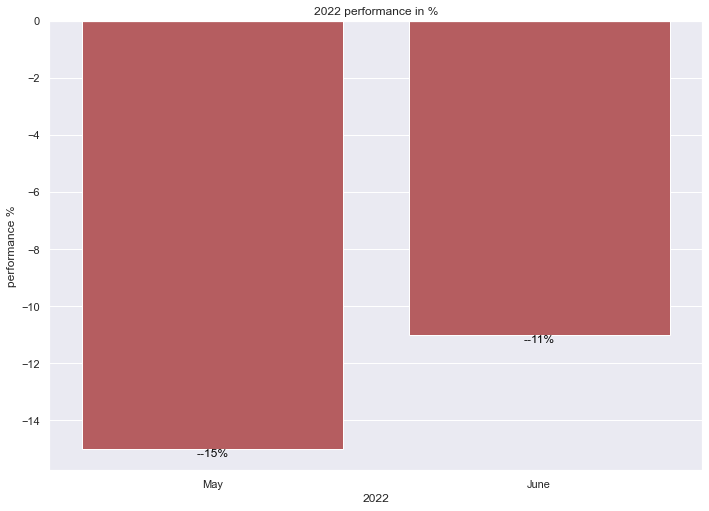

In [7]:
BTobject.plot_bar_by_month(dfTrades=dfTrades)


----- Plot -----


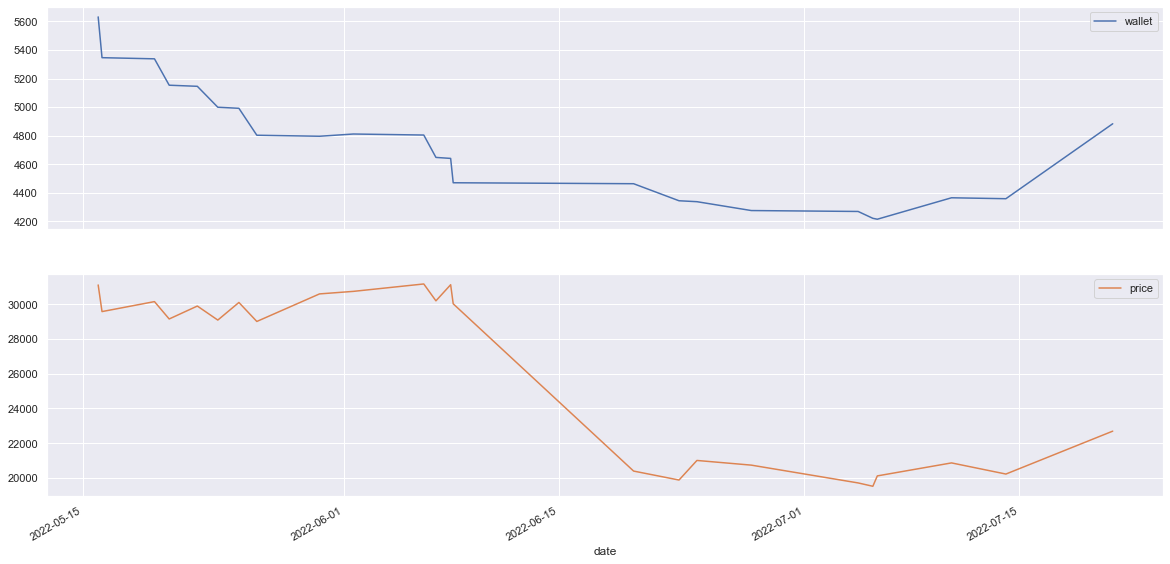

In [8]:
BTobject.plot_wallet_vs_price(dfTrades=dfTrades)